In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras


<h3>California housing dataset</h3></br>
    
   Dataset documentation : 
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
x_temp,x_test,y_temp,y_test = train_test_split(housing.data,housing.target,test_size=0.2)
x_train,x_valid,y_train,y_valid = train_test_split(x_temp,y_temp,test_size=0.2)

In [7]:
print(x_train.shape,y_train.shape)

(13209, 8) (13209,)


In [8]:
print(x_valid.shape,y_valid.shape)

(3303, 8) (3303,)


<h4>Normalization of data</h4>

https://scikit-learn.org/stable/modules/preprocessing.html

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)
X_valid = scalar.transform(x_valid)

In [10]:
print(X_train)

[[ 1.12511218e+00 -5.25933209e-01 -2.27228867e-01 ...  1.62423743e-03
  -8.31607691e-01  7.42317367e-01]
 [ 4.19288377e-01 -1.48004566e+00  1.76897209e-01 ...  4.00082277e-03
   1.07446252e+00 -1.06444697e+00]
 [ 1.14258280e+00 -7.64461321e-01  6.95261145e-01 ... -4.74441741e-02
   4.62464487e-01 -1.05945590e+00]
 ...
 [ 1.78383184e-01 -1.71857377e+00 -2.44321506e-01 ... -1.03255187e-01
  -6.77440248e-01  4.87773221e-01]
 [-1.12623052e+00 -1.00298943e+00 -6.81781045e-01 ... -2.77790017e-02
  -1.12592736e+00  1.17154867e+00]
 [-1.40245243e-01 -1.24151755e+00 -1.42796211e-02 ... -1.69731197e-02
  -7.42844618e-01  9.31977711e-01]]


In [11]:
print(X_test)

[[-0.31468839  0.18965113 -0.64805576 ...  0.19144513 -0.88766858
   0.83215648]
 [-1.03977197 -0.44642384 -0.34322909 ... -0.05484104  1.10249297
  -0.86979556]
 [ 0.88252307  1.30278232  0.22866611 ... -0.05688591  0.89226463
  -1.36890173]
 ...
 [ 3.41876325  0.34866987  1.00453229 ... -0.02734768 -0.69145547
   0.53768384]
 [-0.29006112 -0.20789573 -0.15484421 ...  0.03429819 -0.88299684
   1.67065484]
 [-0.22102058 -1.0824988  -0.01334635 ... -0.03357426 -0.82226421
   0.98188833]]


In [12]:
np.random.seed(30)
tf.random.set_seed(30)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])
#lr -learning rate , mae - mean absolute error

In [16]:
model_history = model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Train on 13209 samples, validate on 3303 samples
Epoch 1/40
13209/13209 [==============================] - 5s 347us/sample - loss: 1.6719 - mae: 0.9361 - val_loss: 0.8007 - val_mae: 0.6641
Epoch 2/40
13209/13209 [==============================] - 4s 273us/sample - loss: 0.7394 - mae: 0.6352 - val_loss: 0.6820 - val_mae: 0.6026
Epoch 3/40
13209/13209 [==============================] - 3s 237us/sample - loss: 0.6627 - mae: 0.5933 - val_loss: 0.6309 - val_mae: 0.5741
Epoch 4/40
13209/13209 [==============================] - 4s 310us/sample - loss: 0.6172 - mae: 0.5694 - val_loss: 0.5945 - val_mae: 0.5573
Epoch 5/40
13209/13209 [==============================] - 3s 247us/sample - loss: 0.5845 - mae: 0.5534 - val_loss: 0.5666 - val_mae: 0.5437
Epoch 6/40
13209/13209 [==============================] - 3s 255us/sample - loss: 0.5589 - mae: 0.5408 - val_loss: 0.5448 - val_mae: 0.5265
Epoch 7/40
13209/13209 [==============================] - 4s 270us/sample - loss: 0.5385 - mae: 0.5288 - val_lo

In [17]:
mae_test = model.evaluate(X_test,y_test)

4128/4128 [==============================] - 1s 272us/sample - loss: 0.3907 - mae: 0.4464


In [18]:
model_history.history

{'loss': [1.6719002238021359,
  0.7394326372099316,
  0.6627139663956205,
  0.6171983022667799,
  0.5845321540766096,
  0.5589259805005345,
  0.5385120119083044,
  0.5219076087251188,
  0.5082336699881843,
  0.4966676152080074,
  0.4873341978232535,
  0.47893638675457795,
  0.4718311362014206,
  0.46593603942348955,
  0.4605372876201881,
  0.45579768262323545,
  0.45158434576383194,
  0.44761605721760395,
  0.44382224907186646,
  0.44078504109429556,
  0.43773056970915863,
  0.43496459093712253,
  0.43219508214554264,
  0.42980366275622595,
  0.4274405025668288,
  0.425032121050014,
  0.4230283973471331,
  0.420878216328696,
  0.4188809103435188,
  0.41675773776717384,
  0.41506097258576763,
  0.41338707732616414,
  0.41144576461167687,
  0.4099239444753423,
  0.40827813988441647,
  0.406549394408221,
  0.40486025479932064,
  0.4033432273813665,
  0.40194729464412754,
  0.400287620252263],
 'mae': [0.9361177,
  0.6352257,
  0.593299,
  0.5693934,
  0.55344635,
  0.5407748,
  0.5288024,

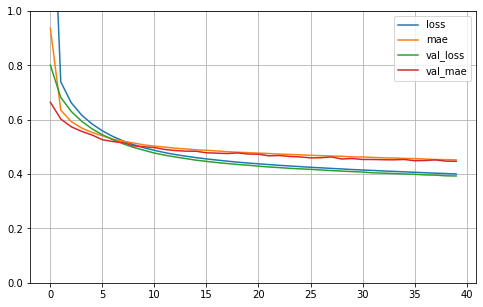

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
x_check = X_test[10:14]

In [21]:
y_pred = model.predict(x_check)

In [22]:
print(y_pred)
print(y_test[10:14])

[[2.5162234]
 [0.632861 ]
 [1.4569075]
 [1.3857031]]
[5.00001 0.579   1.393   1.583  ]


<h3>Functional API</h3>
It provides a more flexible way for defining models.</br>
It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

In [23]:
input1 = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32, activation="relu")(input1)
hidden2 = keras.layers.Dense(32, activation="relu")(hidden1)
concat = keras.layers.concatenate([input1,hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input1],outputs=[output])

In [24]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32)           288         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 32)           1056        dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 40)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

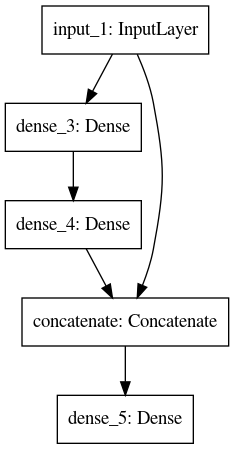

In [25]:
import pydot
keras.utils.plot_model(model2)

In [26]:
model2.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=['mae'])

In [27]:
model2_history = model2.fit(X_train,y_train,epochs=120,validation_data=(X_valid,y_valid))

Train on 13209 samples, validate on 3303 samples
Epoch 1/120
13209/13209 [==============================] - 6s 423us/sample - loss: 2.0049 - mae: 1.0211 - val_loss: 0.8375 - val_mae: 0.6784
Epoch 2/120
13209/13209 [==============================] - 5s 352us/sample - loss: 0.7280 - mae: 0.6316 - val_loss: 0.6596 - val_mae: 0.5867
Epoch 3/120
13209/13209 [==============================] - 4s 301us/sample - loss: 0.6465 - mae: 0.5853 - val_loss: 0.6158 - val_mae: 0.5652
Epoch 4/120
13209/13209 [==============================] - 4s 310us/sample - loss: 0.6123 - mae: 0.5665 - val_loss: 0.5916 - val_mae: 0.5535
Epoch 5/120
13209/13209 [==============================] - 4s 305us/sample - loss: 0.5895 - mae: 0.5559 - val_loss: 0.5692 - val_mae: 0.5444
Epoch 6/120
13209/13209 [==============================] - 5s 384us/sample - loss: 0.5716 - mae: 0.5478 - val_loss: 0.5546 - val_mae: 0.5320
Epoch 7/120
13209/13209 [==============================] - 5s 383us/sample - loss: 0.5577 - mae: 0.5395 -

13209/13209 [==============================] - 3s 196us/sample - loss: 0.4152 - mae: 0.4614 - val_loss: 0.4068 - val_mae: 0.4580
Epoch 59/120
13209/13209 [==============================] - 4s 290us/sample - loss: 0.4144 - mae: 0.4618 - val_loss: 0.4071 - val_mae: 0.4550
Epoch 60/120
13209/13209 [==============================] - 3s 223us/sample - loss: 0.4135 - mae: 0.4608 - val_loss: 0.4050 - val_mae: 0.4551
Epoch 61/120
13209/13209 [==============================] - 5s 396us/sample - loss: 0.4123 - mae: 0.4600 - val_loss: 0.4032 - val_mae: 0.4550
Epoch 62/120
13209/13209 [==============================] - 4s 274us/sample - loss: 0.4117 - mae: 0.4598 - val_loss: 0.4041 - val_mae: 0.4527
Epoch 63/120
13209/13209 [==============================] - 4s 327us/sample - loss: 0.4108 - mae: 0.4587 - val_loss: 0.4027 - val_mae: 0.4553
Epoch 64/120
13209/13209 [==============================] - 4s 303us/sample - loss: 0.4093 - mae: 0.4582 - val_loss: 0.4021 - val_mae: 0.4529
Epoch 65/120
13209/

13209/13209 [==============================] - 3s 258us/sample - loss: 0.3701 - mae: 0.4283 - val_loss: 0.3640 - val_mae: 0.4216
Epoch 116/120
13209/13209 [==============================] - 2s 180us/sample - loss: 0.3745 - mae: 0.4292 - val_loss: 0.3631 - val_mae: 0.4230
Epoch 117/120
13209/13209 [==============================] - 3s 243us/sample - loss: 0.3689 - mae: 0.4270 - val_loss: 0.3610 - val_mae: 0.4244
Epoch 118/120
13209/13209 [==============================] - 3s 229us/sample - loss: 0.3693 - mae: 0.4269 - val_loss: 0.3601 - val_mae: 0.4279
Epoch 119/120
13209/13209 [==============================] - 4s 279us/sample - loss: 0.3692 - mae: 0.4278 - val_loss: 0.3608 - val_mae: 0.4238
Epoch 120/120
13209/13209 [==============================] - 3s 245us/sample - loss: 0.3672 - mae: 0.4256 - val_loss: 0.3603 - val_mae: 0.4220


In [28]:
mae_test2 = model2.evaluate(X_test,y_test)

4128/4128 [==============================] - 1s 202us/sample - loss: 0.3585 - mae: 0.4216


In [29]:
model2_history.history

{'loss': [2.004912701636966,
  0.7279996340339249,
  0.6464832953432416,
  0.6122626447372572,
  0.5895399362315867,
  0.5715642216907911,
  0.5577001555139791,
  0.5461527297585058,
  0.5369833576373738,
  0.5285906071210397,
  0.5216047270390599,
  0.5146799662317332,
  0.5093273138955265,
  0.5047974946307724,
  0.499548871941891,
  0.4954772356583697,
  0.491306849170917,
  0.48750966074826074,
  0.4834727444929596,
  0.48058719977818826,
  0.47668580637448166,
  0.47369718386706544,
  0.471014908108869,
  0.4685481467135282,
  0.4657414472791715,
  0.46297545455696815,
  0.4614795317836836,
  0.45917347485877985,
  0.4567742988617255,
  0.45449901720497227,
  0.45301992488318943,
  0.4510968365358976,
  0.44870701627616166,
  0.44754936773118736,
  0.4462134427653912,
  0.4434062190772962,
  0.44186127017056775,
  0.4403165211101946,
  0.4385950020282109,
  0.4375976904108754,
  0.435422002332867,
  0.43471866857816904,
  0.43325388437415224,
  0.43159354055250015,
  0.43026810784

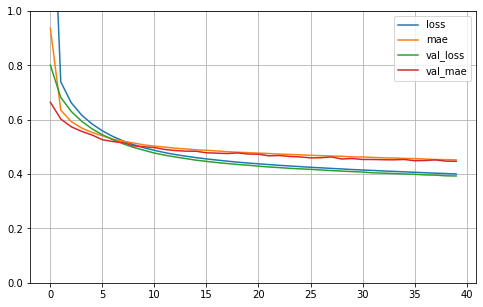

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [31]:
x_check2 = X_test[10:14]

In [32]:
y_pred2 = model2.predict(x_check2)

In [33]:
print(y_pred2)
print(y_test[10:14])

[[2.5893977]
 [0.6318154]
 [1.6457384]
 [1.596528 ]]
[5.00001 0.579   1.393   1.583  ]


<h3>Saving and Restoring Models</h3>

In [34]:
model.save("regression_seq_model.h5")

In [35]:
model2.save("regression_func_model.h5")

In [36]:
#to Check
del model
del model2

In [37]:
keras.backend.clear_session()

In [38]:
model = keras.models.load_model("regression_seq_model.h5")

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [40]:
y_ = model.predict(x_check)

In [41]:
print(y_)

[[2.5162234]
 [0.632861 ]
 [1.4569075]
 [1.3857031]]


In [42]:
model2 = keras.models.load_model("regression_func_model.h5")

In [43]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32)           288         input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 32)           1056        dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 40)           0           input_1[0][0]                    
                                                                 dense_4[0][0]                

In [44]:
y__ = model2.predict(x_check)
print(y__)

[[2.5893977]
 [0.6318154]
 [1.6457384]
 [1.596528 ]]


<h3>Using Callbacks while training</h3>
<h4> creating checkpoints based on epochs </h4>

In [45]:
# we will execute above regression sequential approach again using callbacks for creating checkpoints
keras.backend.clear_session()

In [46]:
np.random.seed(32)
tf.random.set_seed(32)

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(1))

In [48]:
model.compile(loss="mse",optimizer="sgd",metrics=['mae'])

In [49]:
checkpoint_callback = keras.callbacks.ModelCheckpoint("checkpoints_regression/Model-{epoch:02d}.h5")
#this will create checkpoint for each epoch and save it under hdf5 file with name "model-{epoch_count}" Ex: model-5.h5
#{epoch:02d} -> if maximum number of epochs count is two digits ...if count is three digits save it as {epoch:03d}

In [50]:
checkpoint_cb2 = keras.callbacks.ModelCheckpoint("checkpoints_regression/Model_ovw.h5")
# this overwrites the model for every epoch it runs

In [51]:
model_his = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_callback])

Train on 13209 samples, validate on 3303 samples
Epoch 1/10
13209/13209 [==============================] - 4s 292us/sample - loss: 0.7283 - mae: 0.5889 - val_loss: 0.4660 - val_mae: 0.4977
Epoch 2/10
13209/13209 [==============================] - 3s 233us/sample - loss: 0.4535 - mae: 0.4855 - val_loss: 0.4244 - val_mae: 0.4604
Epoch 3/10
13209/13209 [==============================] - 3s 224us/sample - loss: 0.4264 - mae: 0.4678 - val_loss: 0.4053 - val_mae: 0.4622
Epoch 4/10
13209/13209 [==============================] - 3s 190us/sample - loss: 0.4089 - mae: 0.4560 - val_loss: 0.4033 - val_mae: 0.4494
Epoch 5/10
13209/13209 [==============================] - 3s 221us/sample - loss: 0.3972 - mae: 0.4483 - val_loss: 0.3890 - val_mae: 0.4626
Epoch 6/10
13209/13209 [==============================] - 3s 253us/sample - loss: 0.3850 - mae: 0.4399 - val_loss: 0.3689 - val_mae: 0.4387
Epoch 7/10
13209/13209 [==============================] - 3s 210us/sample - loss: 0.3753 - mae: 0.4335 - val_lo

In [52]:
model_his_ = model.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb2])

Train on 13209 samples, validate on 3303 samples
Epoch 1/15
13209/13209 [==============================] - 3s 207us/sample - loss: 0.3500 - mae: 0.4174 - val_loss: 0.3429 - val_mae: 0.4207
Epoch 2/15
13209/13209 [==============================] - 3s 197us/sample - loss: 0.3454 - mae: 0.4129 - val_loss: 0.3413 - val_mae: 0.4040
Epoch 3/15
13209/13209 [==============================] - 3s 229us/sample - loss: 0.3400 - mae: 0.4105 - val_loss: 0.3376 - val_mae: 0.4260
Epoch 4/15
13209/13209 [==============================] - 2s 182us/sample - loss: 0.3372 - mae: 0.4076 - val_loss: 0.3303 - val_mae: 0.4046 - loss: 0
Epoch 5/15
13209/13209 [==============================] - 3s 196us/sample - loss: 0.3347 - mae: 0.4053 - val_loss: 0.3381 - val_mae: 0.4316
Epoch 6/15
13209/13209 [==============================] - 3s 216us/sample - loss: 0.3311 - mae: 0.4032 - val_loss: 0.3201 - val_mae: 0.4071
Epoch 7/15
13209/13209 [==============================] - 2s 172us/sample - loss: 0.3265 - mae: 0.400

In [53]:
del model
keras.backend.clear_session()

In [54]:
model = keras.models.load_model("checkpoints_regression/Model-10.h5")

In [55]:
model.evaluate(X_test,y_test)

4128/4128 [==============================] - 1s 125us/sample - loss: 0.3430 - mae: 0.4120


[0.342961872790673, 0.41203877]

In [56]:
model = keras.models.load_model("checkpoints_regression/Model_ovw.h5")

In [57]:
model.evaluate(X_test,y_test)

4128/4128 [==============================] - 0s 116us/sample - loss: 0.3165 - mae: 0.3916


[0.3164517722966135, 0.39156318]

<h3> Saving only best model </h3>

while training, it keeps track of the best results (i.e..min loss and error in regression) and saves model corresponding to a epoch that generates min loss and error.

In [58]:
del model
keras.backend.clear_session()

In [59]:
np.random.seed(32)
tf.random.set_seed(32)

In [60]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(1))

In [61]:
model.compile(loss="mse",optimizer="sgd",metrics=['mae'])

In [62]:
checkpoint_best = keras.callbacks.ModelCheckpoint("checkpoints_regression/Best_Model.h5",save_best_only=True)

In [63]:
model_his = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[checkpoint_best])

Train on 13209 samples, validate on 3303 samples
Epoch 1/30
13209/13209 [==============================] - 5s 366us/sample - loss: 0.7283 - mae: 0.5889 - val_loss: 0.4660 - val_mae: 0.4977
Epoch 2/30
13209/13209 [==============================] - 5s 350us/sample - loss: 0.4535 - mae: 0.4855 - val_loss: 0.4244 - val_mae: 0.4604
Epoch 3/30
13209/13209 [==============================] - 4s 325us/sample - loss: 0.4264 - mae: 0.4678 - val_loss: 0.4053 - val_mae: 0.4622
Epoch 4/30
13209/13209 [==============================] - 5s 389us/sample - loss: 0.4089 - mae: 0.4560 - val_loss: 0.4033 - val_mae: 0.4494
Epoch 5/30
13209/13209 [==============================] - 4s 326us/sample - loss: 0.3972 - mae: 0.4483 - val_loss: 0.3890 - val_mae: 0.4626
Epoch 6/30
13209/13209 [==============================] - 3s 212us/sample - loss: 0.3850 - mae: 0.4399 - val_loss: 0.3689 - val_mae: 0.4387
Epoch 7/30
13209/13209 [==============================] - 3s 210us/sample - loss: 0.3753 - mae: 0.4335 - val_lo

In [64]:
del model
keras.backend.clear_session()

In [65]:
model = keras.models.load_model("checkpoints_regression/Best_Model.h5")

In [66]:
model.evaluate(X_test,y_test)

4128/4128 [==============================] - 1s 302us/sample - loss: 0.3079 - mae: 0.3861


[0.307900907341824, 0.38607842]

<h3>Early Stop model </h3>
While training, along with keeping track of the best model, it also checks whether there is an improvement in the training after waiting for certain number of epochs(patience).

In [67]:
del model
keras.backend.clear_session()

In [68]:
np.random.seed(32)
tf.random.set_seed(32)

In [80]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(1))

In [81]:
model.compile(loss="mse",optimizer="sgd",metrics=['mae'])

In [82]:
checkpoint_early_stop = keras.callbacks.ModelCheckpoint("checkpoints_regression/Early_Stop_Model.h5",save_best_only=True)

In [83]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#patience - Number of epochs with no improvement after which trainging will be stopped

In [84]:
model_hiss = model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),callbacks=[checkpoint_early_stop, early_stopping_cb])

Train on 13209 samples, validate on 3303 samples
Epoch 1/200
13209/13209 [==============================] - 2s 149us/sample - loss: 1.0373 - mae: 0.6276 - val_loss: 0.5195 - val_mae: 0.5284
Epoch 2/200
13209/13209 [==============================] - 2s 116us/sample - loss: 0.5378 - mae: 0.5048 - val_loss: 0.4250 - val_mae: 0.4602
Epoch 3/200
13209/13209 [==============================] - 2s 120us/sample - loss: 0.4464 - mae: 0.4682 - val_loss: 0.4212 - val_mae: 0.4638
Epoch 4/200
13209/13209 [==============================] - 2s 119us/sample - loss: 0.4093 - mae: 0.4537 - val_loss: 0.4002 - val_mae: 0.4457
Epoch 5/200
13209/13209 [==============================] - 2s 168us/sample - loss: 0.3941 - mae: 0.4451 - val_loss: 0.3819 - val_mae: 0.4564
Epoch 6/200
13209/13209 [==============================] - 2s 131us/sample - loss: 0.3877 - mae: 0.4405 - val_loss: 0.3625 - val_mae: 0.4345
Epoch 7/200
13209/13209 [==============================] - 2s 115us/sample - loss: 0.3759 - mae: 0.4336 -

13209/13209 [==============================] - 1s 108us/sample - loss: 0.2802 - mae: 0.3631 - val_loss: 0.2769 - val_mae: 0.3660
Epoch 59/200
13209/13209 [==============================] - 2s 137us/sample - loss: 0.2790 - mae: 0.3629 - val_loss: 0.2868 - val_mae: 0.3737
Epoch 60/200
13209/13209 [==============================] - 2s 121us/sample - loss: 0.2775 - mae: 0.3621 - val_loss: 0.2820 - val_mae: 0.3778
Epoch 61/200
13209/13209 [==============================] - 1s 96us/sample - loss: 0.2766 - mae: 0.3618 - val_loss: 0.2780 - val_mae: 0.3673
Epoch 62/200
13209/13209 [==============================] - 1s 105us/sample - loss: 0.2766 - mae: 0.3614 - val_loss: 0.2868 - val_mae: 0.3699
Epoch 63/200
13209/13209 [==============================] - 1s 100us/sample - loss: 0.2751 - mae: 0.3592 - val_loss: 0.2922 - val_mae: 0.3822
Epoch 64/200
13209/13209 [==============================] - 2s 183us/sample - loss: 0.2760 - mae: 0.3607 - val_loss: 0.2762 - val_mae: 0.3616
Epoch 65/200
13209/1

In [85]:
# We can see that training is stopped at 83rd epoch since 73rd epoch result is better than 83rd

In [86]:
del model
keras.backend.clear_session()

In [87]:
early_stop_model = keras.models.load_model("checkpoints_regression/Early_Stop_Model.h5")

In [88]:
early_stop_model.evaluate(X_test,y_test)

4128/4128 [==============================] - 1s 227us/sample - loss: 0.2768 - mae: 0.3589


[0.27676930642405223, 0.3588598]